In [89]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
import pandas as pd
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [2]:
import pandas as pd 
dataset=pd.read_csv("/content/titanic-passengers (1).csv", sep=";")

In [3]:
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

In [101]:
x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=10)

In [72]:
x_train.head

<bound method NDFrame.head of      PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare
57           117       3    1  70.5      0      0   7.7500
717          478       3    1  29.0      1      0   7.0458
431            4       1    0  35.0      1      0  53.1000
633           35       1    1  28.0      1      0  82.1708
163          859       3    0  24.0      0      3  19.2583
..           ...     ...  ...   ...    ...    ...      ...
369           52       3    1  21.0      0      0   7.8000
320          395       3    0  24.0      0      2  16.7000
527           58       3    1  28.5      0      0   7.2292
125          314       3    1  28.0      0      0   7.8958
265          797       1    0  49.0      0      0  25.9292

[712 rows x 7 columns]>

In [76]:
male_df = x_train[x_train['Sex']==1]

In [77]:
male_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
57,117,3,1,70.500000,0,0,7.7500
717,478,3,1,29.000000,1,0,7.0458
633,35,1,1,28.000000,1,0,82.1708
864,179,2,1,30.000000,0,0,13.0000
467,289,2,1,42.000000,0,0,13.0000
...,...,...,...,...,...,...,...
156,791,3,1,29.699118,0,0,7.7500
123,648,1,1,56.000000,0,0,35.5000
369,52,3,1,21.000000,0,0,7.8000
527,58,3,1,28.500000,0,0,7.2292


In [95]:
#applying tree algorithm

model = tree.DecisionTreeClassifier(criterion="entropy",max_depth=6, splitter= "random",random_state=1234)  
model.fit(x_train, y_train)               # fitting our model
y_pred=model.predict(x_test)              #   evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))  # accuracy_score 'this function computes subset accuracy'

score:0.8212290502793296


In [92]:
regr = DecisionTreeClassifier(max_depth=2, random_state=1234)
model = regr.fit(x, y)
text_representation = export_text(regr)
print(text_representation)

|--- feature_2 <= 0.50
|   |--- feature_1 <= 2.50
|   |   |--- class: 1
|   |--- feature_1 >  2.50
|   |   |--- class: 0
|--- feature_2 >  0.50
|   |--- feature_3 <= 6.50
|   |   |--- class: 1
|   |--- feature_3 >  6.50
|   |   |--- class: 0



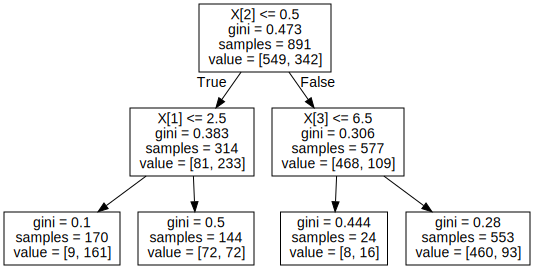

In [93]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [102]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.832089552238806
